In [2]:
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp


In [4]:
mp_df = pd.read_excel("../../data/moving_population/ingu_hour_mapo.xlsx",sheet_name=0)

In [5]:
ingu_var = [x for x in mp_df.columns if '_ingu' in x]

In [6]:
mp_df_2 = pd.melt(mp_df,['hour','gu_name','dong_name'],value_vars=ingu_var,var_name='성별연령대',value_name='인구')
mp_df_2.head()

,hour,gu_name,dong_name,성별연령대,인구
0,0,마포구,아현동,under10_ingu,0.930341
1,0,마포구,아현동,under10_ingu,0.439934
2,0,마포구,아현동,under10_ingu,1.186017
3,0,마포구,아현동,under10_ingu,0.040449
4,0,마포구,아현동,under10_ingu,1.422992


In [7]:
mp_df_2['연령대'] = mp_df_2['성별연령대'].str.slice(stop=7)
mp_df_2['성별'] = mp_df_2['성별연령대'].str.slice(start=8)
mp_df_2.head()

,hour,gu_name,dong_name,성별연령대,인구,연령대,성별
0,0,마포구,아현동,under10_ingu,0.930341,under10,ingu
1,0,마포구,아현동,under10_ingu,0.439934,under10,ingu
2,0,마포구,아현동,under10_ingu,1.186017,under10,ingu
3,0,마포구,아현동,under10_ingu,0.040449,under10,ingu
4,0,마포구,아현동,under10_ingu,1.422992,under10,ingu


In [8]:
mp_df_2_temp = mp_df_2[mp_df_2['성별']=='ingu'].groupby('연령대').sum()
mp_df_2_temp['남성'] = mp_df_2[mp_df_2['성별']=='male_ingu'].groupby('연령대').sum()['인구']
mp_df_2_temp['여성'] = mp_df_2[mp_df_2['성별']=='female_ingu'].groupby('연령대').sum()['인구']

In [9]:
mp_df_2_temp['남녀합'] = mp_df_2_temp.apply(lambda row:row['남성']+row['여성'],axis=1)
mp_df_2_temp.loc[:,['남성','여성','남녀합','인구']]

,남성,여성,남녀합,인구
연령대,,,,
under10,21150.163555,25420.854306,46571.017861,46571.017861
under20,164446.999346,182409.680518,346856.679864,346856.679864
under30,399642.226989,482564.410994,882206.637982,882206.637982
under40,471511.111013,455532.456175,927043.567189,927043.567189
under50,452703.165684,436499.256046,889202.421730,889202.421730
under60,346064.255209,347563.469004,693627.724213,693627.724213
under70,228068.059016,248618.542811,476686.601827,476686.601827
under80,117487.081238,135079.248804,252566.330041,252566.330041
upper80,33397.618981,41111.222892,74508.841873,356251.288817


In [10]:
mp_df_2_temp.rename(columns={'남성': 'male', '여성': 'female','남녀합':'sum','인구':'ingu'}, inplace=True)

In [11]:
mp_df_2['연령대'].unique()

array(['under10', 'under20', 'under30', 'under40', 'under50', 'under60',
       'under70', 'under80', 'upper80'], dtype=object)

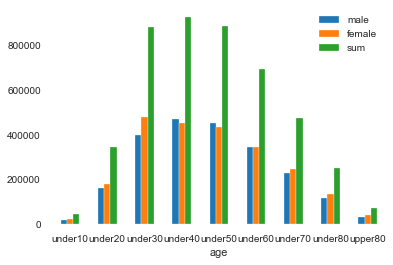

In [12]:
analysis_age = mp_df_2_temp.loc[:,['male','female','sum']]
analysis_age['age'] = mp_df_2['연령대'].unique()
ax = analysis_age.plot.bar(x='age', rot=0)
plt.savefig('analysis_age_mp.png')

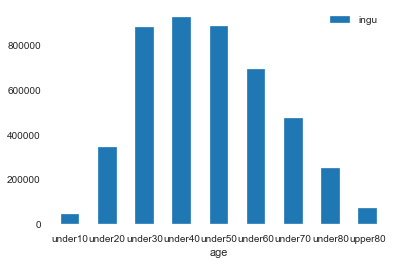

In [17]:
analysis_age.rename(columns={'sum':'ingu'},inplace=True)
ax3 = analysis_age.loc[:,['age','ingu']].plot.bar(x='age',y='ingu',rot=0)
plt.savefig('analysis_age_mp_total.png')

In [12]:
mp_df_2 = mp_df_2[mp_df_2['성별']!='ingu']
analysis_time = mp_df_2[mp_df_2['성별']=='male_ingu'].groupby('hour').sum()
analysis_time.rename(columns={'인구':'male'},inplace=True)

analysis_time['female'] = mp_df_2[mp_df_2['성별']=='female_ingu'].groupby('hour').sum()
analysis_time['sum'] = analysis_time.apply(lambda row:row['male']+row['female'],axis=1)
analysis_time

,male,female,sum
hour,,,
0,86656.824118,90183.903966,176840.728083
1,84987.109013,89264.517595,174251.626607
2,83824.045373,88690.380360,172514.425733
3,82889.797315,88117.542113,171007.339428
4,82179.730119,87523.564664,169703.294783
5,82982.473957,87421.513143,170403.987100
6,84496.595797,88043.438832,172540.034629
7,87360.664704,90678.165371,178038.830075
8,90590.865919,96026.846648,186617.712568


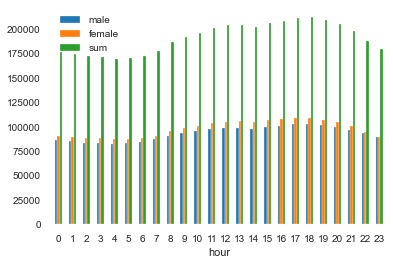

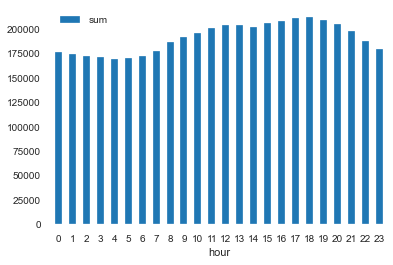

In [20]:
ax = analysis_time.plot.bar( rot=0)
plt.savefig('analysis_time_mp.png')
ax2 = analysis_time.loc[:,['sum']].plot.bar( rot=0)
plt.savefig('analysis_time_mp_total.png')

### 시간대별 연령대 누적 그래프 그리기

In [13]:
male_ingu_var =[x for x in ingu_var if 'male' in x]
female_ingu_var =[x for x in ingu_var if 'female' in x]
print(male_ingu_var)
print(female_ingu_var)

['under10_male_ingu', 'under20_male_ingu', 'under30_male_ingu', 'under40_male_ingu', 'under50_male_ingu', 'under60_male_ingu', 'under70_male_ingu', 'under80_male_ingu', 'upper80_male_ingu', 'under10_female_ingu', 'under20_female_ingu', 'under30_female_ingu', 'under40_female_ingu', 'under50_female_ingu', 'under60_female_ingu', 'under70_female_ingu', 'under80_female_ingu', 'upper80_female_ingu']
['under10_female_ingu', 'under20_female_ingu', 'under30_female_ingu', 'under40_female_ingu', 'under50_female_ingu', 'under60_female_ingu', 'under70_female_ingu', 'under80_female_ingu', 'upper80_female_ingu']


In [14]:
new_ingu_var = [x.split('_')[0] for x in ingu_var if len(x)<13]
mp_df_3 = mp_df.loc[:,['hour','gu_name','dong_name']]
for idx,_var in enumerate(new_ingu_var):
    mp_df_3[_var] = mp_df.apply(lambda row:row[male_ingu_var[idx]]+row[female_ingu_var[idx]],axis=1)


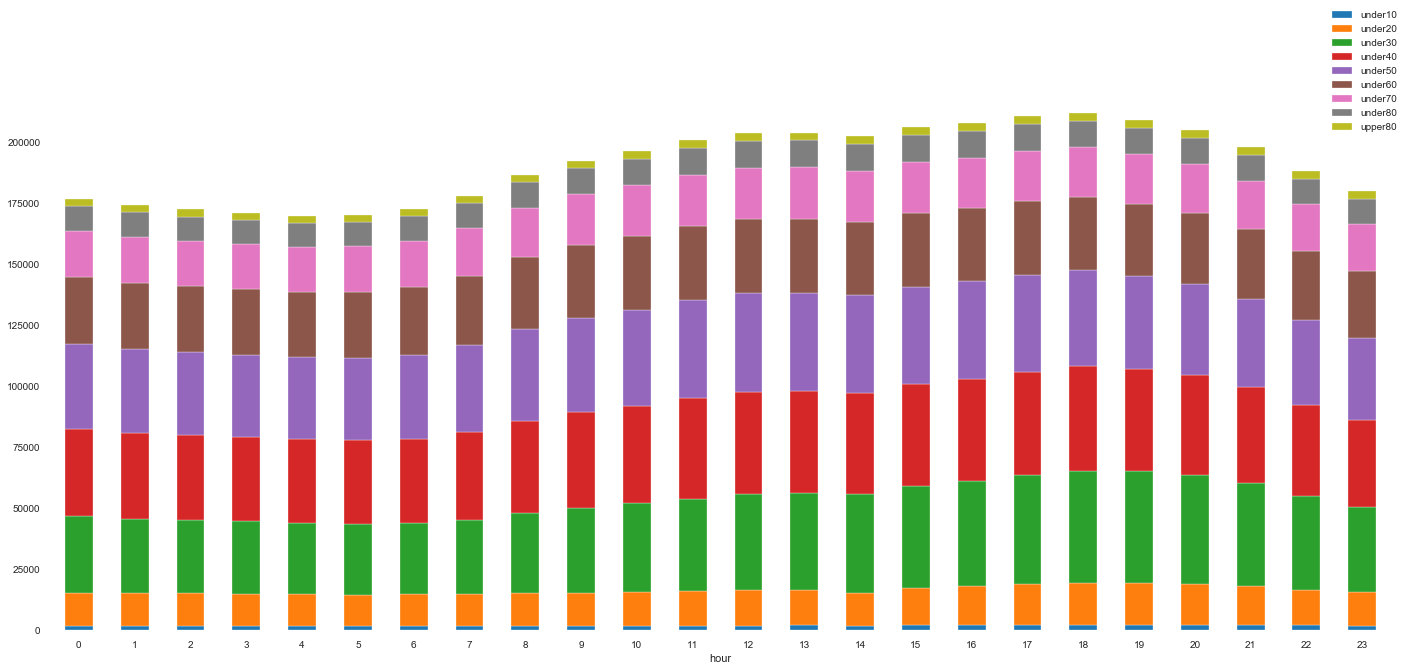

In [23]:
analysis_time_stack = mp_df_3.groupby('hour').sum()
analysis_time_stack2 = analysis_time_stack.copy()
analysis_time_stack2['hour'] = mp_df_3['hour'].unique()
ax4 = analysis_time_stack2.plot.bar(x='hour',rot=0,stacked=True,figsize=(24, 10))
ax4.legend(bbox_to_anchor=(0.95, 0.9)) 
# plt.savefig('analysis_time_mp_total_wrt_age2.png')

### 시간대별 연령대 인구수 히트맵 그리기

In [24]:
analysis_time_stack

,under10,under20,under30,under40,under50,under60,under70,under80,upper80
hour,,,,,,,,,
0,1936.387239,13551.221201,31206.474349,35971.616196,34708.556264,27460.179601,18883.159600,10089.211771,3033.921862
1,1902.341281,13448.422280,30348.965334,35320.206942,34289.514123,27175.130071,18805.913018,9983.875268,2977.258291
2,1867.113459,13347.457824,29956.843154,34849.066095,33896.290955,27020.638515,18668.854167,9952.106369,2956.055196
3,1826.650163,13224.277195,29549.871285,34558.923979,33693.873696,26965.762896,18477.296760,9807.903733,2902.779721
4,1768.246068,13052.265810,29333.826834,34289.906714,33417.901162,26755.881097,18426.243621,9778.102553,2880.920924
5,1761.103895,12886.116483,29104.100538,34309.749646,33543.751078,27133.545899,18871.373224,9903.008237,2891.238100
6,1750.458019,12925.209447,29112.646988,34732.853653,34391.921597,27646.085494,19127.297534,9958.874837,2894.687059
7,1795.768452,13080.525025,30287.460562,35945.704612,35874.783962,28385.441374,19533.136277,10211.103960,2924.905850
8,1900.321997,13416.145729,32593.866453,37980.325927,37669.327045,29259.584565,20272.873084,10527.453761,2997.814005


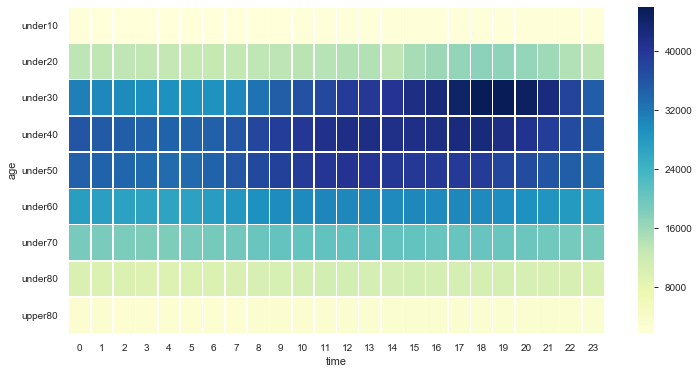

In [47]:
analysis_time_stack_heatmap = analysis_time_stack.transpose()
analysis_time_stack_heatmap
plt.figure(figsize=(12, 6))
snsplt = sns.heatmap(analysis_time_stack_heatmap,cmap="YlGnBu", linewidths=.5)
snsplt.set_xlabel("time")
snsplt.set_ylabel("age")
sns_fig = snsplt.get_figure()

sns_fig.savefig('time_age_population_mp.png')

In [48]:
analysis_time_stack_heatmap

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
under10,1936.387239,1902.341281,1867.113459,1826.650163,1768.246068,1761.103895,1750.458019,1795.768452,1900.321997,1915.497827,...,1954.155145,2033.988456,2064.770411,2092.881498,2094.702980,2077.032772,2067.062428,2018.596402,1982.493100,1932.063254
under20,13551.221201,13448.422280,13347.457824,13224.277195,13052.265810,12886.116483,12925.209447,13080.525025,13416.145729,13552.872079,...,13495.668626,15291.937516,16250.709320,16954.056326,17407.893723,17256.758750,16744.129355,16048.625399,14471.938940,13662.603346
under30,31206.474349,30348.965334,29956.843154,29549.871285,29333.826834,29104.100538,29112.646988,30287.460562,32593.866453,34801.964917,...,40435.238566,41915.839439,43037.932666,44495.312390,45919.512628,45983.139853,45043.801813,42425.185735,38488.299966,34889.296269
under40,35971.616196,35320.206942,34849.066095,34558.923979,34289.906714,34309.749646,34732.853653,35945.704612,37980.325927,39208.157554,...,41365.379153,41539.401710,41844.444877,42503.225929,42852.890852,41874.500004,40866.037030,39219.614928,37481.625326,35614.714987
under50,34708.556264,34289.514123,33896.290955,33693.873696,33417.901162,33543.751078,34391.921597,35874.783962,37669.327045,38691.368392,...,40006.334951,39912.768051,39796.318852,39701.900897,39250.524005,37876.218291,37178.765994,36149.265584,34884.115304,33764.511868
under60,27460.179601,27175.130071,27020.638515,26965.762896,26755.881097,27133.545899,27646.085494,28385.441374,29259.584565,29866.302247,...,30190.781911,30379.154809,30215.029774,30308.396371,30143.418822,29618.563284,29293.833496,28764.546881,28039.957025,27506.381550
under70,18883.159600,18805.913018,18668.854167,18477.296760,18426.243621,18871.373224,19127.297534,19533.136277,20272.873084,20641.290615,...,20785.676416,20759.773437,20516.254541,20544.458038,20430.772881,20348.315266,19916.886118,19576.276220,19339.702485,19050.694501
under80,10089.211771,9983.875268,9952.106369,9807.903733,9778.102553,9903.008237,9958.874837,10211.103960,10527.453761,10685.470181,...,10985.640640,11135.215399,10983.966041,11045.067516,10830.928036,10735.427831,10591.829031,10496.046579,10402.695680,10306.892153
upper80,3033.921862,2977.258291,2956.055196,2902.779721,2880.920924,2891.238100,2894.687059,2924.905850,2997.814005,3034.652347,...,3227.551521,3236.691613,3272.130329,3288.173491,3281.381186,3269.116088,3269.417018,3247.236348,3183.633384,3147.203061


### 유출입 인구수 파악을 위해 거주지 인구수와의 차이를 가시화

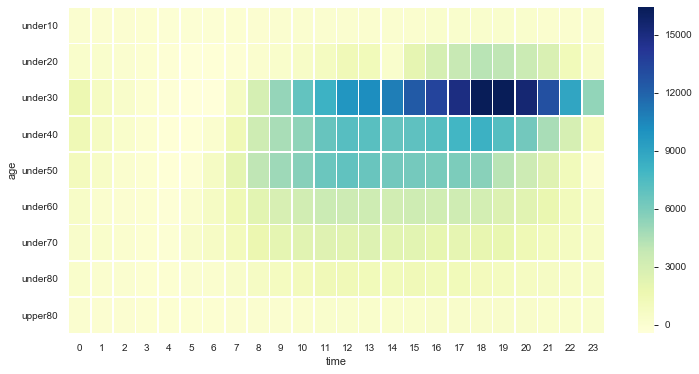

In [59]:
analysis_time_heatmap_wrt3 = analysis_time_stack_heatmap.copy()
for idx in range(24):
    analysis_time_heatmap_wrt3[idx] = analysis_time_stack_heatmap[idx]-analysis_time_stack_heatmap[3]
analysis_time_heatmap_wrt3.describe()
vmin = analysis_time_heatmap_wrt3.min().min()
# analysis_time_heatmap_wrt3
plt.figure(figsize=(12, 6))
snsplt = sns.heatmap(analysis_time_heatmap_wrt3,cmap="YlGnBu", linewidths=.5,vmin=vmin)
snsplt.set_xlabel("time")
snsplt.set_ylabel("age")
sns_fig = snsplt.get_figure()

sns_fig.savefig('time_age_population_mp_wrt3.png')